## Benchmark Study: Bai and Perron 

- [Install ](https://centre-borelli.github.io/ruptures-docs/install/)
- [Tutorial](https://centre-borelli.github.io/ruptures-docs/user-guide/costs/costlinear/)

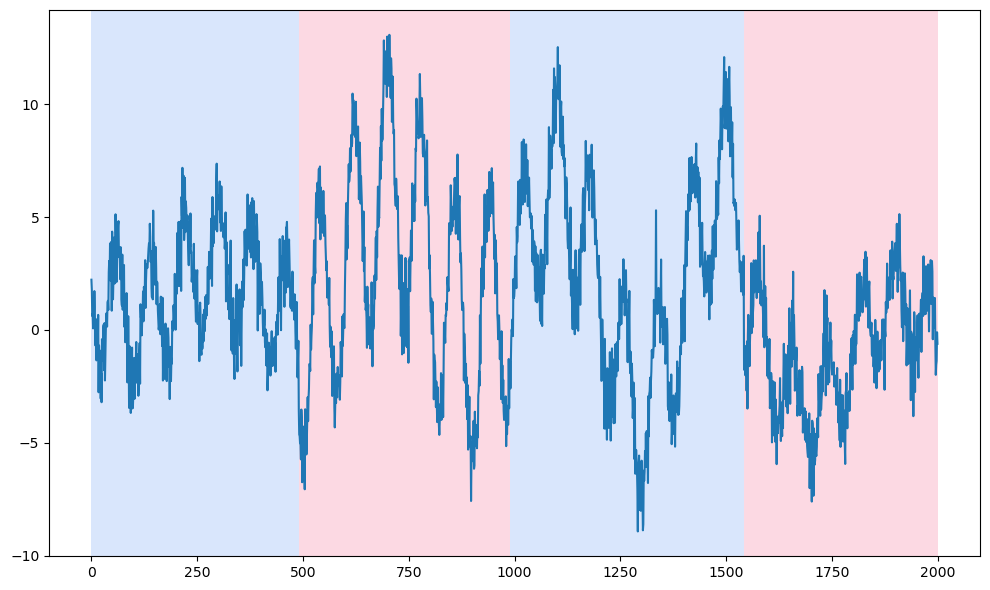

In [1]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt
import statsmodels.api as sm

# creation of data
n, n_reg = 2000, 3  # number of samples, number of regressors (including intercept)
n_bkps = 3  # number of change points
# regressors
tt = np.linspace(0, 10 * np.pi, n)
X = np.vstack((np.sin(tt), np.sin(5 * tt), np.ones(n))).T
# parameter vectors
deltas, bkps = rpt.pw_constant(n, n_reg, n_bkps, noise_std=None, delta=(1, 3))
# observed signal
y = np.sum(X * deltas, axis=1)
y += np.random.normal(size=y.shape)
# display signal
rpt.show.display(y, bkps, figsize=(10, 6))
plt.show()

In [45]:
bkps

[481, 979, 1475, 2000]

In [38]:
y

array([2.77686202, 4.09418602, 1.97928129, ..., 7.75664445, 9.66556558,
       8.07757538])

In [39]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.57151743e-02,  7.84982641e-02,  1.00000000e+00],
       [ 3.14264671e-02,  1.56512076e-01,  1.00000000e+00],
       ...,
       [-3.14264671e-02, -1.56512076e-01,  1.00000000e+00],
       [-1.57151743e-02, -7.84982641e-02,  1.00000000e+00],
       [-1.22464680e-15,  9.82193362e-16,  1.00000000e+00]])

In [40]:
# stack observed signal and regressors.
# first dimension is the observed signal.
signal = np.column_stack((y.reshape(-1, 1), X))
signal

array([[ 2.77686202e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 4.09418602e+00,  1.57151743e-02,  7.84982641e-02,
         1.00000000e+00],
       [ 1.97928129e+00,  3.14264671e-02,  1.56512076e-01,
         1.00000000e+00],
       ...,
       [ 7.75664445e+00, -3.14264671e-02, -1.56512076e-01,
         1.00000000e+00],
       [ 9.66556558e+00, -1.57151743e-02, -7.84982641e-02,
         1.00000000e+00],
       [ 8.07757538e+00, -1.22464680e-15,  9.82193362e-16,
         1.00000000e+00]])

In [4]:
c = rpt.costs.CostLinear().fit(signal)
print(c.error(50, 150))

75.3667153960265


In [5]:
print(c.sum_of_costs(bkps))
print(c.sum_of_costs([10, 100, 200, 250, n]))

1901.5837914585884
8409.321241401783


In [25]:
c = rpt.costs.CostLinear()
algo = rpt.Dynp(custom_cost=c)
# is equivalent to
algo = rpt.Dynp(model="linear").fit(signal)

In [26]:
result = algo.predict(n_bkps)
result

[485, 970, 1495, 2000]

In [28]:
result.clear

<function list.clear()>

In [2]:
import pandas as pd

In [3]:
df_simulated = pd.read_csv("simulation_data_R.csv")
df_simulated

,Y,const,X1,X2,X3,X4,X5
0,0.143331,1,-0.073556,-0.715242,2.198810,-0.710407,-0.560476
1,-0.622176,1,-1.168651,-0.752689,1.312413,0.256884,-0.230177
2,0.455604,1,-0.634748,-0.938539,-0.265145,-0.246692,1.558708
3,0.052630,1,-0.028842,-1.052513,0.543194,-0.347543,0.070508
4,-2.552477,1,0.670696,-0.437160,-0.414340,-0.951619,0.129288
...,...,...,...,...,...,...,...
195,-0.719312,1,-0.089975,-0.701004,0.818828,2.458060,-1.155917
196,-1.238804,1,1.070516,0.241046,0.388365,-0.162422,-0.127149
197,2.308334,1,-1.351100,-0.352453,-0.445935,-0.097451,-1.941518
198,1.666200,1,-0.522617,0.371148,0.231115,0.420574,1.181181


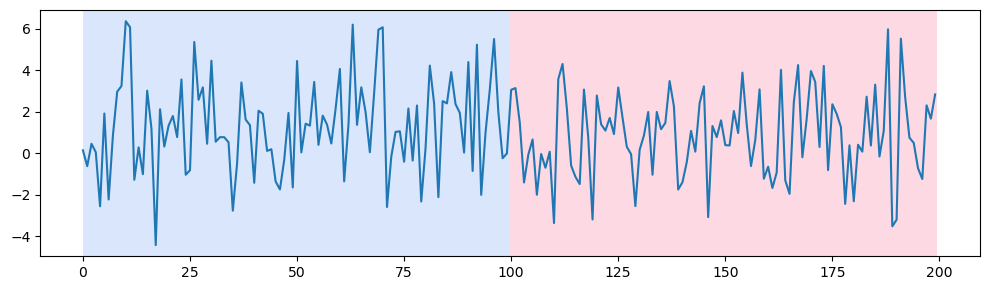

In [4]:
rpt.show.display(df_simulated.Y.to_numpy(), [100, 200], figsize=(10, 3))
plt.show()

In [5]:
array_simulated = df_simulated.values
array_simulated

array([[ 0.14333121,  1.        , -0.07355602, ...,  2.19881035,
        -0.71040656, -0.56047565],
       [-0.62217624,  1.        , -1.16865142, ...,  1.31241298,
         0.25688371, -0.23017749],
       [ 0.45560417,  1.        , -0.63474826, ..., -0.26514506,
        -0.24669188,  1.55870831],
       ...,
       [ 2.30833432,  1.        , -1.35110039, ..., -0.44593503,
        -0.09745125, -1.94151838],
       [ 1.6662    ,  1.        , -0.5226167 , ...,  0.23111493,
         0.42057419,  1.18118089],
       [ 2.83449978,  1.        , -0.24919068, ...,  0.64751336,
        -1.61403946,  1.85991086]])

In [8]:
for i in range(5):
    print("Given the number of change points: ", str(i))
    # fitting 
    algo_BP = rpt.Dynp(model="linear", min_size = 30, jump = 1).fit(array_simulated)
    
    # locations of change points given the number of change points:
    result_BP = algo_BP.predict(i)
    
    print("locations: ", result_BP)
    
    # Residuals Sum of Squared
    cost_BP = rpt.costs.CostLinear().fit(array_simulated) 
    rss = cost_BP.sum_of_costs(result_BP)
    print("RSS: ", str(rss))
    
    print("----------------------")
    print("----------------------")
    print("----------------------")
    
    

Given the number of change points:  0
locations:  [200]
RSS:  671.5433616644332
----------------------
----------------------
----------------------
Given the number of change points:  1
locations:  [100, 200]
RSS:  194.33506001916288
----------------------
----------------------
----------------------
Given the number of change points:  2
locations:  [42, 100, 200]
RSS:  183.48506155356878
----------------------
----------------------
----------------------
Given the number of change points:  3
locations:  [42, 100, 166, 200]
RSS:  177.00478929836973
----------------------
----------------------
----------------------
Given the number of change points:  4
locations:  [42, 97, 127, 159, 200]
RSS:  171.85177383334195
----------------------
----------------------
----------------------


In [17]:
# fitting 
algo_BP = rpt.Dynp(model="linear").fit(array_simulated)
# locations of change points given the number of change points:
result_BP = algo_BP.predict(3)
result_BP

[10, 15, 100, 200]

In [18]:
# Residuals Sum of Squared
cost_BP_1 = rpt.costs.CostLinear().fit(array_simulated)
cost_BP_1.sum_of_costs(result_BP)

172.39987484232995

In [112]:
# BIC
result_ols1_1 = sm.OLS(array_simulated[0:100, 0], array_simulated[0:100, 1:]).fit()
result_ols1_2 = sm.OLS(array_simulated[100:200, 0], array_simulated[100:200, 1:]).fit()
14*np.log(200)- 2*(result_ols1_1.llf+result_ols1_2.llf)

-142.06599126795106